In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [5]:
train_df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

## Initial analysis
The data set contains 10 columns where the `rings` column is the multi classification target column.

The list of columns
- id - Identity variable, not used in prediction
- Sex - Categorical variable, need to convert to one hot encoding
- Length - Float value
- Diameter - Float value
- Height - Float value
- Whole weight - Float value
- Whole weight.1 - Float value

- Whole weight.2 - Float value
- Shell weight - Float value
- Rings - Target value, ordinal numerical value

# Handle Null Value
There seems to be no null value present in the whole data set

In [6]:
train_df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

### Checking for distribution of target value

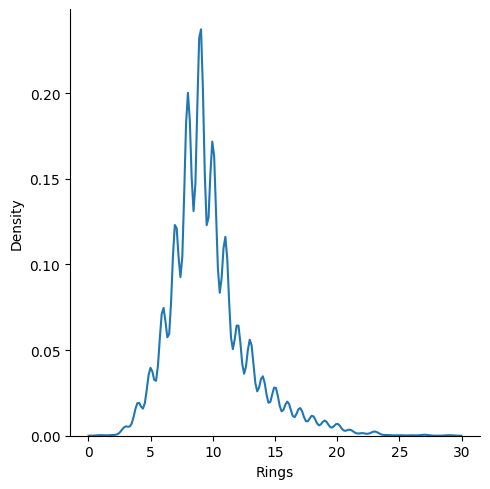

In [7]:
sns.displot(data=train_df, x = "Rings",kind='kde')

No idea, how to handle imbalanced multi categorical value 
TODO: Check how to do that


### Checking Distribution of each column


In [8]:
train_df.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Correlation between columns


It seems the All the columns are positively correlated with each other except to the rings. So it's better to use PCA on those columns and convert into 2 columns.

<Axes: >

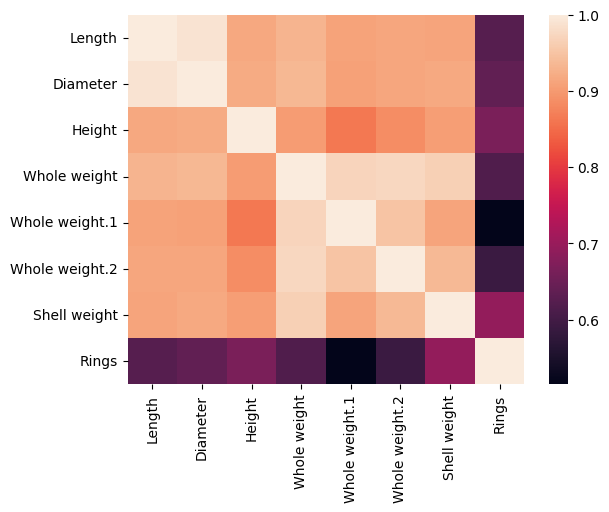

In [9]:
sns.heatmap(train_df.drop(["id", "Sex"], axis=1).corr())

<Axes: xlabel='Sex', ylabel='count'>

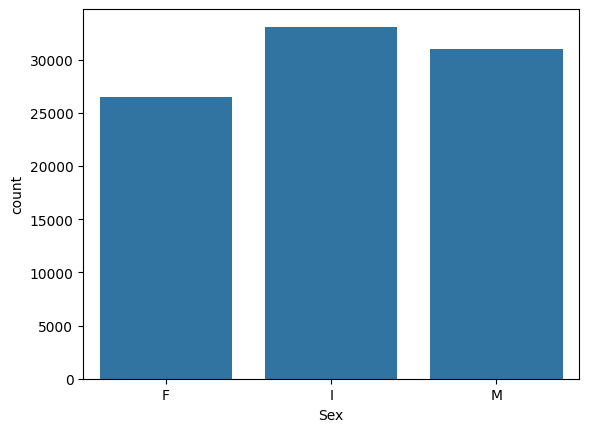

In [10]:
sns.countplot(data=train_df, x="Sex")

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca_util = PCA(random_state=10, n_components= 2)

In [13]:
highly_corr_val = train_df.drop(["id", "Sex", "Rings"], axis=1).columns.values
highly_corr_val

array(['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight'], dtype=object)

In [14]:
pca_output = pca_util.fit_transform(X=train_df[highly_corr_val], y = train_df["Rings"])
train_pca = pd.DataFrame(pca_output, columns=["pc1", "pc2"])
train_pca

,pc1,pc2
0,-0.007655,-0.049828
1,0.409022,-0.040579
2,-0.978413,0.186932
3,0.159462,-0.061513
4,0.007739,-0.014120
...,...,...
90610,-0.764301,0.043586
90611,0.110372,-0.007948
90612,-0.543414,-0.019162
90613,-0.702711,0.032271


In [15]:
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()

In [37]:
hot_encoded_train = pd.get_dummies(train_df[["Sex"]]).drop("Sex_M", axis=1)

In [16]:
combined_train = pd.concat([hot_encoded_train,  train_pca], axis = 1)
combined_train

,Sex_F,Sex_I,pc1,pc2
0,1,0,-0.007655,-0.049828
1,1,0,0.409022,-0.040579
2,0,1,-0.978413,0.186932
3,0,0,0.159462,-0.061513
4,0,1,0.007739,-0.014120
...,...,...,...,...
90610,0,0,-0.764301,0.043586
90611,0,0,0.110372,-0.007948
90612,0,1,-0.543414,-0.019162
90613,0,1,-0.702711,0.032271


In [17]:
linear_reg_model.fit(X = combined_train, y = train_df["Rings"])

LinearRegression()

### Pre processing of test

In [18]:
pca_output = pca_util.fit_transform(X=test_df[highly_corr_val])
test_pca = pd.DataFrame(pca_output, columns=["pc1", "pc2"])
test_pca

,pc1,pc2
0,0.560525,0.053125
1,0.256816,0.005484
2,0.063684,-0.028272
3,0.105948,-0.065138
4,-0.512255,-0.004655
...,...,...
60406,-0.741499,0.027237
60407,0.061260,0.025283
60408,0.334772,-0.010305
60409,0.817000,-0.005998


In [39]:
hot_encoded_test = pd.get_dummies(test_df[["Sex"]]).drop("Sex_M", axis=1)

In [19]:
combined_test = pd.concat([hot_encoded_test,  test_pca], axis = 1)
combined_test

,Sex_F,Sex_I,pc1,pc2
0,0,0,0.560525,0.053125
1,0,0,0.256816,0.005484
2,0,0,0.063684,-0.028272
3,0,0,0.105948,-0.065138
4,0,1,-0.512255,-0.004655
...,...,...,...,...
60406,0,1,-0.741499,0.027237
60407,1,0,0.061260,0.025283
60408,0,1,0.334772,-0.010305
60409,1,0,0.817000,-0.005998


In [20]:
prediction = linear_reg_model.predict(combined_test).round()

In [21]:
test_output = pd.concat([test_df["id"], pd.DataFrame(prediction, columns=["Rings"]),], axis = 1)
test_output

,id,Rings
0,90615,11.0
1,90616,11.0
2,90617,11.0
3,90618,11.0
4,90619,8.0
...,...,...
60406,151021,6.0
60407,151022,10.0
60408,151023,10.0
60409,151024,13.0


In [22]:
# test_output.to_csv("submission_1.csv",index=False)

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [ ]:
rf_reg.fit(X = combined_train, y = train_df["Rings"])

In [ ]:
prediction = linear_reg_model.predict(combined_test)
prediction

array([10.66460517, 10.62138127, 10.66023763, ..., 10.47498392,
       12.71630624,  8.8467895 ])

In [ ]:
test_output = pd.concat([test_df["id"], pd.DataFrame(prediction, columns=["Rings"]),], axis = 1)
test_output

,id,Rings
0,90615,10.664605
1,90616,10.621381
2,90617,10.660238
3,90618,11.499808
4,90619,7.699862
...,...,...
60406,151021,6.366906
60407,151022,9.737387
60408,151023,10.474984
60409,151024,12.716306


In [ ]:
# test_output.to_csv("submission_2.csv",index=False)

In [25]:
from xgboost import XGBRegressor

In [33]:
# Copied from kaggle
xgb_params = {'grow_policy': 'lossguide', 'n_estimators': 300, 'learning_rate': 0.09471805900675286, 'max_bin': 2048, 'max_depth': 8, 'reg_lambda': 33.33929116223339, 'min_child_weight': 27.048028004026204, 'colsample_bytree': 0.6105442825961575, 'objective': 'reg:squarederror', 'tree_method': 'hist', 'gamma': 0, 'enable_categorical': True}

xgb_reg =XGBRegressor(**xgb_params)
xgb_reg.fit(combined_train, train_df["Rings"])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6105442825961575, device=None,
             early_stopping_rounds=None, enable_categorical=True,
             eval_metric=None, feature_types=None, gamma=0,
             grow_policy='lossguide', importance_type=None,
             interaction_constraints=None, learning_rate=0.09471805900675286,
             max_bin=2048, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=27.048028004026204, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [34]:
xgb_pred = xgb_reg.predict(combined_test)
xgb_pred

array([10.08129 ,  9.76157 , 10.349636, ..., 10.558807, 13.98974 ,
        8.546316], dtype=float32)

In [35]:
test_output = pd.concat([test_df["id"], pd.DataFrame(prediction, columns=["Rings"]),], axis = 1)
test_output
test_output.to_csv("submission_3_xgb_2.csv",index=False)

In [40]:
org_train_df = pd.concat( [train_df[highly_corr_val],hot_encoded_train ], axis = 1)
org_test_df = pd.concat([test_df[highly_corr_val], hot_encoded_test], axis= 1)

org_train_df

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_F,Sex_I
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,1,0
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,1,0
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,0,1
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,0,0
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,0,1
...,...,...,...,...,...,...,...,...,...
90610,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,0,0
90611,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,0,0
90612,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,0,1
90613,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,0,1


In [48]:
## Doing training on all the data without PCA.

# Copied from kaggle
# xgb_params = {'grow_policy': 'lossguide', 'n_estimators': 300, 'learning_rate': 0.09471805900675286, 'max_bin': 2048, 'max_depth': 8, 'reg_lambda': 33.33929116223339, 'min_child_weight': 27.048028004026204, 'colsample_bytree': 0.6105442825961575, 'objective': 'reg:squarederror', 'tree_method': 'hist', 'gamma': 0, 'enable_categorical': True}

xgb_reg =XGBRegressor()
xgb_reg.fit(org_train_df, train_df["Rings"])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X = org_train_df, y = train_df["Rings"])
rf_pred = linear_reg_model.predict(combined_test)
rf_pred


array([10.66460517, 10.62138127, 10.66023763, ..., 10.47498392,
       12.71630624,  8.8467895 ])

In [49]:
xgb_pred = xgb_reg.predict(org_test_df)
xgb_pred

array([ 9.777536 ,  9.523411 , 10.2769165, ..., 12.375806 , 13.930794 ,
        8.561693 ], dtype=float32)

In [50]:
test_output = pd.concat([test_df["id"], pd.DataFrame(xgb_pred, columns=["Rings"]),], axis = 1)
test_output
test_output.to_csv("submission_3_xgb_no_tuning.csv",index=False)